In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('../eda/data_3_targets.csv')
data = data.set_index('image_id')
data

,age_approximate,sex,melanoma,seborrheic_keratosis,neither,red_mode,green_mode,blue_mode,red_median,green_median,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
image_id,,,,,,,,,,,,,,,,,,,,,
ISIC_0000000,55,female,0,0,1,65,51,57,94,79,...,5.098648,0.109615,2.625431,0.508180,11.428232,10.780367,0.012018,0.329654,0.006513,0.046969
ISIC_0000001,30,female,0,0,1,87,53,46,116,72,...,4.441031,0.140831,2.777913,0.575211,2.318644,4.577623,0.021560,0.808480,0.006020,0.124740
ISIC_0000002,60,female,1,0,0,162,120,114,161,131,...,2.709728,0.168455,1.932127,0.540123,2.526498,0.231924,0.547760,0.007574,0.000012,0.941026
ISIC_0000003,30,male,0,0,1,182,128,51,161,110,...,2.581140,0.216727,2.214528,0.542617,2.665591,3.318969,0.040507,0.119264,0.000637,0.080628
ISIC_0000004,80,male,1,0,0,192,132,171,192,128,...,18.402358,0.129868,4.275156,0.564438,2.312946,0.506435,0.043551,3.153283,0.021736,2.213424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ISIC_0015220,75,male,0,1,0,120,36,20,136,57,...,3.702858,0.155806,4.435975,0.188760,213.351940,11.504115,0.014350,0.271341,0.005850,0.070004
ISIC_0015233,60,male,0,1,0,71,124,101,115,80,...,4.671226,0.112319,3.028206,0.536858,2.644843,11.205961,0.007821,0.237932,0.001880,0.042187
ISIC_0015260,55,female,0,1,0,76,21,13,77,40,...,2.564094,0.197151,4.190389,0.181698,164.827636,8.735373,0.009154,0.904079,0.002138,0.132170


# neither Vs melanoma + seborrheic_keratosis

In [3]:
data_neither_vs_melkeratosis = data.copy()

In [4]:
data_neither_vs_melkeratosis.insert(2, "mel_keratosis", 0)

In [5]:
for index, row in data_neither_vs_melkeratosis.iterrows():
        if data_neither_vs_melkeratosis["melanoma"][index]  == 1 or data_neither_vs_melkeratosis["seborrheic_keratosis"][index] == 1:
            data_neither_vs_melkeratosis["mel_keratosis"][index] = 1.0

/tmp/ipykernel_8464/1935494762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_neither_vs_melkeratosis["mel_keratosis"][index] = 1.0


In [6]:
data_neither_vs_melkeratosis = data_neither_vs_melkeratosis.drop(["melanoma", "seborrheic_keratosis"], axis=1)

In [7]:
data_neither_vs_melkeratosis

,age_approximate,sex,mel_keratosis,neither,red_mode,green_mode,blue_mode,red_median,green_median,blue_median,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
image_id,,,,,,,,,,,,,,,,,,,,,
ISIC_0000000,55,female,0,1,65,51,57,94,79,84,...,5.098648,0.109615,2.625431,0.508180,11.428232,10.780367,0.012018,0.329654,0.006513,0.046969
ISIC_0000001,30,female,0,1,87,53,46,116,72,55,...,4.441031,0.140831,2.777913,0.575211,2.318644,4.577623,0.021560,0.808480,0.006020,0.124740
ISIC_0000002,60,female,1,0,162,120,114,161,131,131,...,2.709728,0.168455,1.932127,0.540123,2.526498,0.231924,0.547760,0.007574,0.000012,0.941026
ISIC_0000003,30,male,0,1,182,128,51,161,110,71,...,2.581140,0.216727,2.214528,0.542617,2.665591,3.318969,0.040507,0.119264,0.000637,0.080628
ISIC_0000004,80,male,1,0,192,132,171,192,128,157,...,18.402358,0.129868,4.275156,0.564438,2.312946,0.506435,0.043551,3.153283,0.021736,2.213424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ISIC_0015220,75,male,1,0,120,36,20,136,57,46,...,3.702858,0.155806,4.435975,0.188760,213.351940,11.504115,0.014350,0.271341,0.005850,0.070004
ISIC_0015233,60,male,1,0,71,124,101,115,80,63,...,4.671226,0.112319,3.028206,0.536858,2.644843,11.205961,0.007821,0.237932,0.001880,0.042187
ISIC_0015260,55,female,1,0,76,21,13,77,40,24,...,2.564094,0.197151,4.190389,0.181698,164.827636,8.735373,0.009154,0.904079,0.002138,0.132170


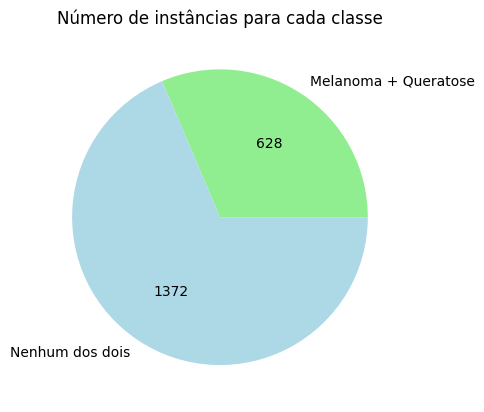

In [8]:
counts = np.array([(data_neither_vs_melkeratosis["mel_keratosis"].values == 1).sum(),
          (data_neither_vs_melkeratosis["neither"].values == 1).sum()])

colors = ['lightgreen', 'lightblue']

classes = "Melanoma + Queratose", "Nenhum dos dois"

def absolute_value(val):
    a  = np.round(val/100.*counts.sum(), 0)
    return int(a)


plt.pie(counts, labels=classes, colors=colors, autopct=absolute_value)
plt.title('Número de instâncias para cada classe')
plt.show()

In [9]:
data_neither_vs_melkeratosis.to_csv("neither_vs_melkeratosis.csv")

# 50% neither Vs melanoma Vs seborrheic_keratosis

In [10]:
one = data.copy()

In [11]:
indexes = one[one.neither == 1].sample(frac=0.5).index
one = one.drop(indexes)

In [12]:
print(data["neither"].value_counts())
print(one["neither"].value_counts())

1    1372
0     628
Name: neither, dtype: int64
1    686
0    628
Name: neither, dtype: int64


In [13]:
one

,age_approximate,sex,melanoma,seborrheic_keratosis,neither,red_mode,green_mode,blue_mode,red_median,green_median,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
image_id,,,,,,,,,,,,,,,,,,,,,
ISIC_0000001,30,female,0,0,1,87,53,46,116,72,...,4.441031,0.140831,2.777913,0.575211,2.318644,4.577623,0.021560,0.808480,0.006020,0.124740
ISIC_0000002,60,female,1,0,0,162,120,114,161,131,...,2.709728,0.168455,1.932127,0.540123,2.526498,0.231924,0.547760,0.007574,0.000012,0.941026
ISIC_0000004,80,male,1,0,0,192,132,171,192,128,...,18.402358,0.129868,4.275156,0.564438,2.312946,0.506435,0.043551,3.153283,0.021736,2.213424
ISIC_0000006,25,female,0,0,1,213,123,100,187,152,...,0.999912,0.641466,2.115149,0.592953,1.629161,14.107023,0.048779,0.049819,0.004353,0.046243
ISIC_0000009,30,female,0,0,1,187,122,90,194,138,...,1.866512,0.433151,2.553233,0.598177,1.871148,33.795948,0.021462,0.065349,0.016073,0.021467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ISIC_0015220,75,male,0,1,0,120,36,20,136,57,...,3.702858,0.155806,4.435975,0.188760,213.351940,11.504115,0.014350,0.271341,0.005850,0.070004
ISIC_0015233,60,male,0,1,0,71,124,101,115,80,...,4.671226,0.112319,3.028206,0.536858,2.644843,11.205961,0.007821,0.237932,0.001880,0.042187
ISIC_0015260,55,female,0,1,0,76,21,13,77,40,...,2.564094,0.197151,4.190389,0.181698,164.827636,8.735373,0.009154,0.904079,0.002138,0.132170


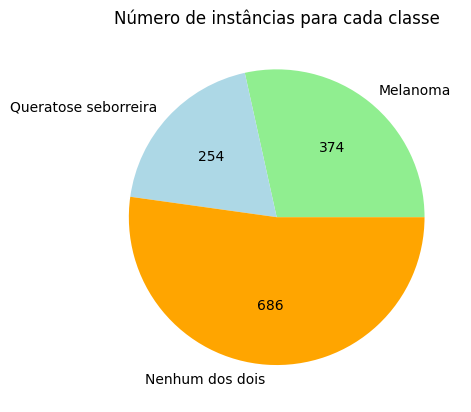

In [14]:
counts = np.array([(one["melanoma"].values == 1).sum(),
          (one["seborrheic_keratosis"].values == 1).sum(),
          (one["neither"].values == 1).sum()])

colors = ['lightgreen', 'lightblue', 'orange']

classes = "Melanoma", "Queratose seborreira", "Nenhum dos dois"

def absolute_value(val):
    a  = np.round(val/100.*counts.sum(), 0)
    return int(a)


plt.pie(counts, labels=classes, colors=colors, autopct=absolute_value)
plt.title('Número de instâncias para cada classe')
plt.show()

In [15]:
one.to_csv("50neither_vs_mel_keratosis.csv")

# melanoma Vs seborrheic_keratosis

In [16]:
data_mel_vs_keratosis = data.copy()

In [17]:
data_mel_vs_keratosis = data_mel_vs_keratosis.loc[(data_mel_vs_keratosis["neither"] != 1)]

In [18]:
data_mel_vs_keratosis = data_mel_vs_keratosis.drop(["neither"], axis=1)

In [19]:
data_mel_vs_keratosis

,age_approximate,sex,melanoma,seborrheic_keratosis,red_mode,green_mode,blue_mode,red_median,green_median,blue_median,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
image_id,,,,,,,,,,,,,,,,,,,,,
ISIC_0000002,60,female,1,0,162,120,114,161,131,131,...,2.709728,0.168455,1.932127,0.540123,2.526498,0.231924,0.547760,0.007574,0.000012,0.941026
ISIC_0000004,80,male,1,0,192,132,171,192,128,157,...,18.402358,0.129868,4.275156,0.564438,2.312946,0.506435,0.043551,3.153283,0.021736,2.213424
ISIC_0000013,30,female,1,0,53,42,35,74,50,44,...,5.231696,0.107047,2.583501,0.573072,2.010527,3.834255,0.018689,0.506384,0.002537,0.112319
ISIC_0000022,55,female,1,0,232,219,226,208,161,138,...,5.823893,0.073753,2.152690,0.511753,6.725529,0.898096,0.064182,0.087609,0.000087,0.453332
ISIC_0000026,30,female,1,0,229,200,211,225,176,181,...,2.525697,0.177221,1.978001,0.540887,2.643203,3.876660,0.066860,0.009824,0.000214,0.071006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ISIC_0015220,75,male,0,1,120,36,20,136,57,46,...,3.702858,0.155806,4.435975,0.188760,213.351940,11.504115,0.014350,0.271341,0.005850,0.070004
ISIC_0015233,60,male,0,1,71,124,101,115,80,63,...,4.671226,0.112319,3.028206,0.536858,2.644843,11.205961,0.007821,0.237932,0.001880,0.042187
ISIC_0015260,55,female,0,1,76,21,13,77,40,24,...,2.564094,0.197151,4.190389,0.181698,164.827636,8.735373,0.009154,0.904079,0.002138,0.132170


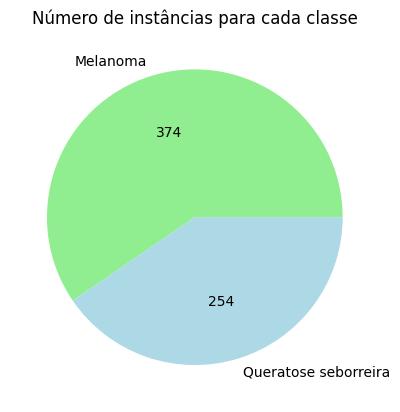

In [20]:
counts = np.array([(data_mel_vs_keratosis["melanoma"].values == 1).sum(),
          (data_mel_vs_keratosis["seborrheic_keratosis"].values == 1).sum()])

colors = ['lightgreen', 'lightblue']

classes = "Melanoma", "Queratose seborreira"

def absolute_value(val):
    a  = np.round(val/100.*counts.sum(), 0)
    return int(a)


plt.pie(counts, labels=classes, colors=colors, autopct=absolute_value)
plt.title('Número de instâncias para cada classe')
plt.show()

In [21]:
data_mel_vs_keratosis.to_csv("mel_vs_keratosis.csv")